In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv('data4a.csv')

In [3]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


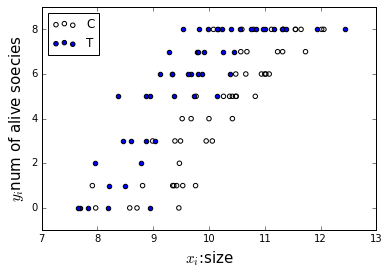

In [4]:
plt.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none',label='C')
plt.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y,label='T')
plt.legend(loc='upper left')
plt.xlabel('$x_{i}$:size',fontsize=15)
plt.ylabel('$y_i$num of alive soecies',fontsize=15)
plt.show()

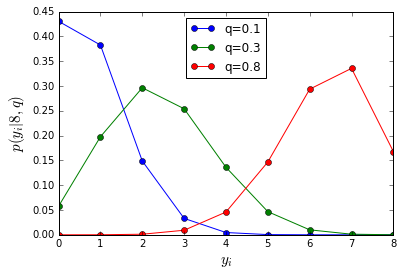

In [5]:
from scipy.stats import binom
x = np.arange(0,9)
plt.plot(x,binom.pmf(x,8.,0.1),'o-',label='q=0.1')
plt.plot(x,binom.pmf(x,8.,0.3),'o-',label='q=0.3')
plt.plot(x,binom.pmf(x,8.,0.8),'o-',label='q=0.8')
plt.legend(loc='upper center')
plt.xlabel('$y_i$',fontsize=15)
plt.ylabel('$p(y_{i}|8,q)$',fontsize=15)
plt.show()

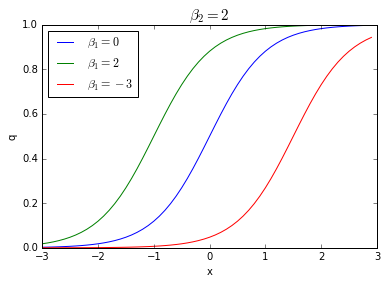

In [6]:
def logistic(beta1,beta2,x):
    return 1. / (1+np.exp(-(beta1+beta2*x)))

x = np.arange(-3,3,0.1)
plt.title('$\\beta_{2} =2$',fontsize=15)
plt.plot(x,logistic(0,2,x),label='$\\beta_{1} =0$')
plt.plot(x,logistic(2,2,x),label='$\\beta_{1} =2$')
plt.plot(x,logistic(-3,2,x),label='$\\beta_{1} =-3$')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

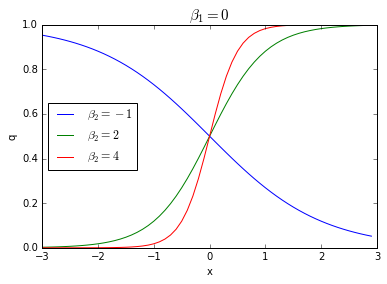

In [7]:
plt.title('$\\beta_{1} =0$',fontsize=15)
plt.plot(x,logistic(0,-1,x),label='$\\beta_{2} =-1$')
plt.plot(x,logistic(0,2,x),label='$\\beta_{2} =2$')
plt.plot(x,logistic(0,4,x),label='$\\beta_{2} =4$')
plt.legend(loc='center left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

In [8]:
data['f_int'] = (data['f'] == 'T').astype(int)
data.x_c = sm.add_constant(data[['x','f_int']])
data['N-y']=data['N']-data['y']
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()#binominalを分布に使う場合は、非説明変数は[成功数,失敗数]とすること。
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Fri, 22 Jul 2016   Deviance:                       123.03
Time:                        10:25:23   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.5361      1.414    -13.818      0.000       -22.307   -16.765
x              1.9524      0.139     14.059      0.000         1.680     2.225
f_int          2.0215      0.231      8.740      0.000         1.568     2.475
==============================================================================
"""

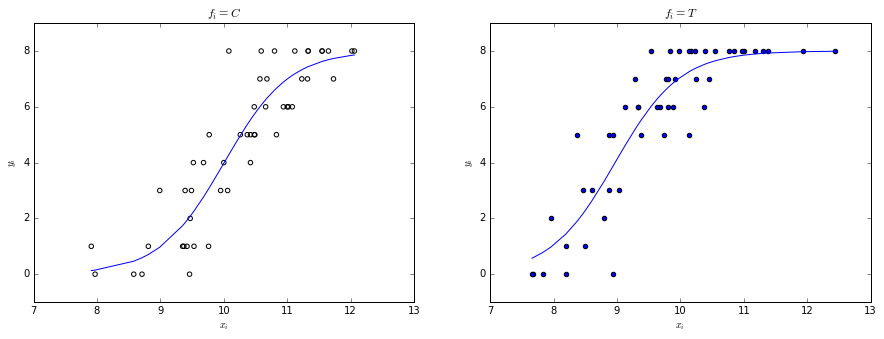

In [32]:
def logistic(x):
    return 1. / (1+np.exp(-x))

data['predict'] = result.predict()#返ってくるのは規格化された値
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none')
ax1.plot(data[data['f']=='C'].sort_values('x').x,data[data['f']=='C'].sort_values('x').predict*8.)
ax2.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y)
ax2.plot(data[data['f']=='T'].sort_values('x').x,data[data['f']=='T'].sort_values('x').predict*8.)
ax1.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=C$')
ax2.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=T$')
plt.show()